In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, PrecisionRecallDisplay
from imblearn.over_sampling import SMOTE
import joblib
sns.set(style="whitegrid")
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import precision_recall_curve, average_precision_score

Loading the dataset...
Error: The dataset file was not found. Please check the file path.
Please ensure you have downloaded the dataset and placed it in the correct directory.
Dataset contains 283726 rows and 31 columns.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Fractional value: 0.0016698852262818046
Fraud Cases detected: 473
Valid Transactions: 283253
Total Transactions: 283726

Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Duplicate rows: 0
After dropping duplicates: (283726, 31)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 n

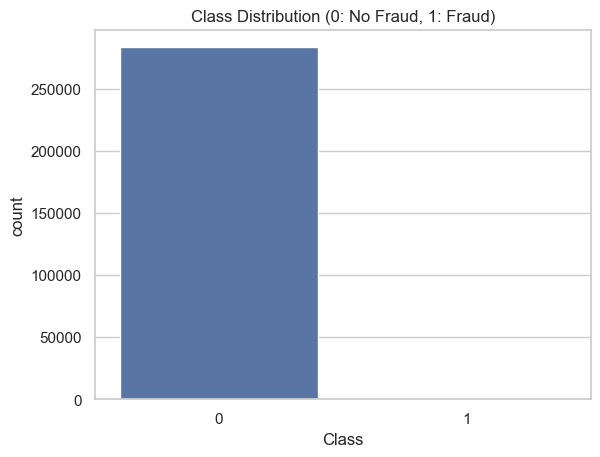

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


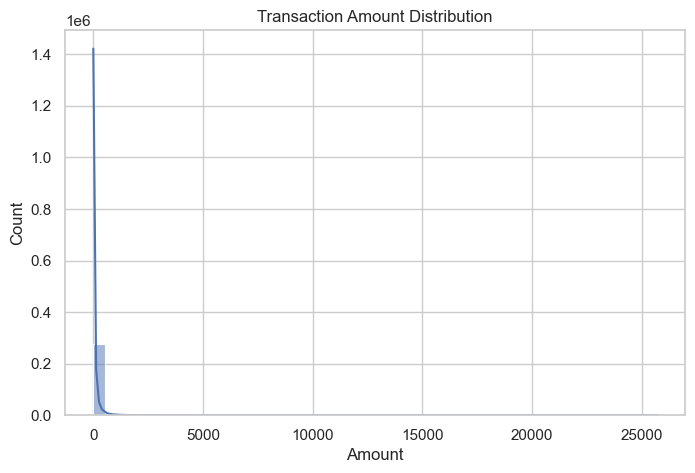

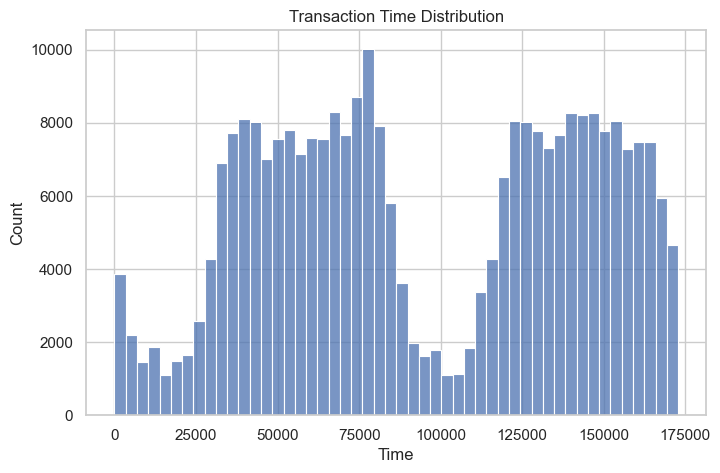

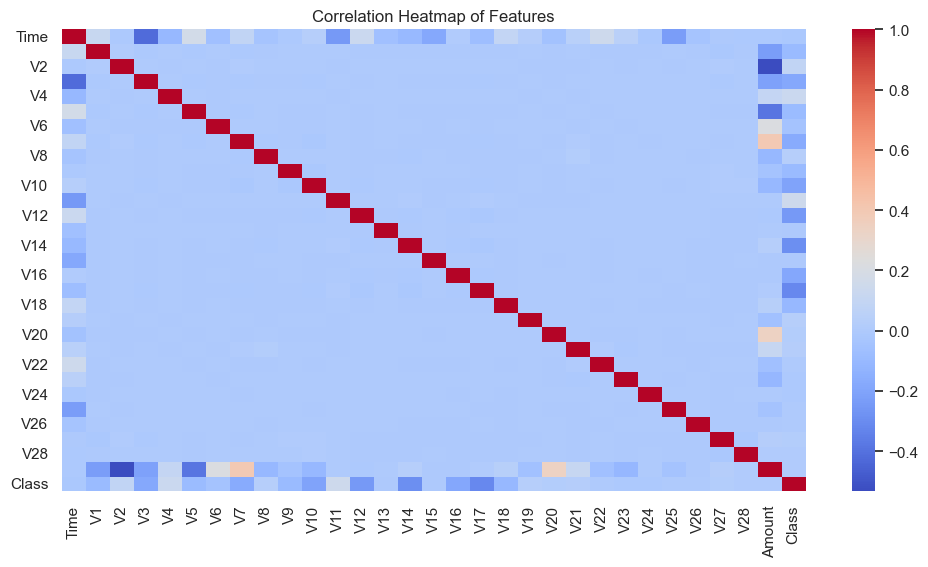

In [32]:
# ### 2. Loading the Data
print("Loading the dataset...")
try:
    df = pd.read_csv(r'C:\Users\0634901877\Downloads\Credit-Card-Fraud-Detection\Credit-Card-Fraud-Detection\data\creditcard.csv') 
    display(df.head())
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The dataset file was not found. Please check the file path.")
    print("Please ensure you have downloaded the dataset and placed it in the correct directory.")

print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
display(df.describe())

# proportion of transactions that are fraud
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

fractional_value = len(fraud)/(len(valid))
print("Fractional value:", fractional_value)

print("Fraud Cases detected: {}".format(len(df[df['Class'] == 1])))
print("Valid Transactions: {}".format(len(df[df['Class'] == 0])))
print("Total Transactions: {}".format(len(df)))


# === Missing Values & Duplicates ===
print("\nMissing values per column:\n", df.isna().sum())
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("After dropping duplicates:", df.shape)
if df.isna().sum().sum() > 0:
    df = df.dropna()
    print("After dropping NA:", df.shape)


# === Dataset Info ===
print("\nDataset info:")
df.info()


# === Class Balance ===
fraud_counts = df['Class'].value_counts()
transaction = len(df)

fraud_percentage = (fraud_counts.get(1, 0) / transaction) * 100
print(f"Percentage of fraudulent transactions: {fraud_percentage:.4f}%")
print("This confirms a severe class imbalance, which must be addressed in our modeling.")

sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0: No Fraud, 1: Fraud)")
plt.show()
print(df["Class"].value_counts(normalize=True))


# === Feature Distributions ===
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['Time'], bins=50, kde=False)
plt.title("Transaction Time Distribution")
plt.show()


# === Correlation Heatmap ===
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

In [33]:
# ### 1. Importing Libraries
# These are the libraries we will be using for data manipulation, visualization, and machine learning.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB

sns.set_style("whitegrid")


# ### 2. Loading the Data
# We will load the credit card fraud detection dataset from a CSV file, which works for everyone on the team.

print("Loading the dataset...")
try:
    # The path '..\data\creditcard.csv' means go up one directory, then into the 'data' folder.
    df = pd.read_csv(r'C:\Users\0634901877\Downloads\Credit-Card-Fraud-Detection\Credit-Card-Fraud-Detection\data\creditcard.csv') 
    display(df)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The dataset file was not found. Please check the file path.")
    print("Please ensure you have downloaded the dataset and placed it in the correct directory.")
    # In a real script, we would exit here.
    # exit()


print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
df.describe()


# proportion of transactions that are fraud
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

fractional_value = len(fraud)/(len(valid))
print("Fractional value:", fractional_value)

print("Fraud Cases detected: {}".format(len(df[df['Class'] == 1])))
print("Valid Transactions: {}".format(len(df[df['Class'] == 0])))
print("Total Transactions: {}".format(len(df)))


print("Missing values per column:\n", df.isna().sum())
df = df.drop_duplicates()
print("After dropping duplicates:", df.shape)
if df.isna().sum().sum() > 0:
    df = df.dropna()
    print("After dropping NA:", df.shape)


print("\nDataset info:")
df.info()


# compute counts of each class (0: valid, 1: fraud) and total transactions
fraud_counts = df['Class'].value_counts()
transaction = len(df)

fraud_percentage = (fraud_counts.get(1, 0) / transaction) * 100
print(f"Percentage of fraudulent transactions: {fraud_percentage:.4f}%")
print("This confirms a severe class imbalance, which must be addressed in our modeling.")


Loading the dataset...
Error: The dataset file was not found. Please check the file path.
Please ensure you have downloaded the dataset and placed it in the correct directory.
Dataset contains 283726 rows and 31 columns.
Fractional value: 0.0016698852262818046
Fraud Cases detected: 473
Valid Transactions: 283253
Total Transactions: 283726
Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
After dropping duplicates: (283726, 31)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time

Using existing train/test split.


c:\Users\ACER\Desktop\Credit-Card-Fraud-Detection\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Baseline Logistic Regression Evaluation ===
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     85295
           1     0.8559    0.6419    0.7336       148

    accuracy                         0.9992     85443
   macro avg     0.9276    0.8209    0.8666     85443
weighted avg     0.9991    0.9992    0.9991     85443

ROC AUC: 0.9428


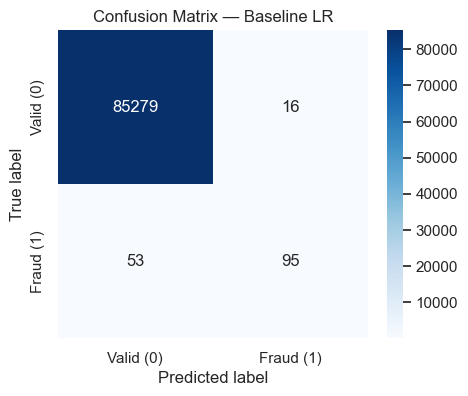

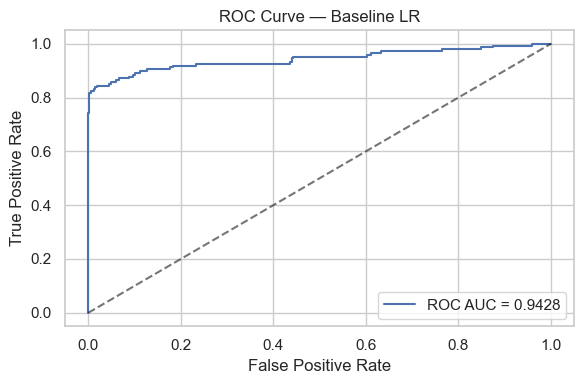

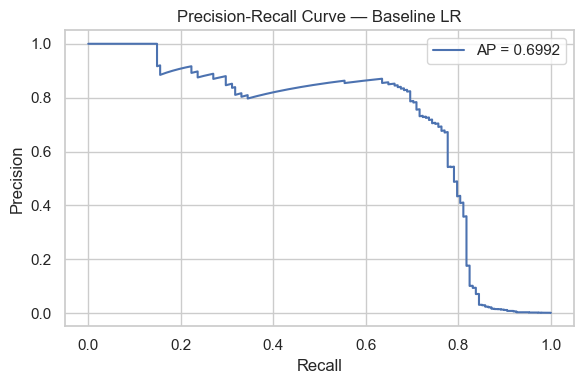


Notes:
- This baseline is trained on the original imbalanced data (no SMOTE/weighting).
- Use these results as a reference when you apply SMOTE or class-weighting in later tasks (C-3, C-4).
          ---Task C-2 complete---


In [34]:


# Ensure X, y and a train/test split exist; create if missing
if 'X_train' not in globals() or 'X_test' not in globals():
    features = [c for c in df.columns if c not in ['Class', 'Amount', 'Time']]
    X = df[features]
    y = df['Class']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )
    print("Created train/test split:", X_train.shape, X_test.shape)
else:
    print("Using existing train/test split.")

# Train baseline logistic regression (no resampling here)
baseline_lr = LogisticRegression(max_iter=2000, random_state=42)
baseline_lr.fit(X_train, y_train)

# Predictions & probabilities
y_pred = baseline_lr.predict(X_test)
y_prob = baseline_lr.predict_proba(X_test)[:, 1]

# Metrics
print("\n=== Baseline Logistic Regression Evaluation ===")
print(classification_report(y_test, y_pred, digits=4))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Valid (0)","Fraud (1)"], yticklabels=["Valid (0)","Fraud (1)"])
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix — Baseline LR")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.4f}')
plt.plot([0,1],[0,1], 'k--', alpha=0.6)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Baseline LR")
plt.legend()
plt.tight_layout()
plt.show()

# Precision-Recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_prec = average_precision_score(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'AP = {avg_prec:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve — Baseline LR")
plt.legend()
plt.tight_layout()
plt.show()

print("\nNotes:")
print("- This baseline is trained on the original imbalanced data (no SMOTE/weighting).")
print("- Use these results as a reference when you apply SMOTE or class-weighting in later tasks (C-3, C-4).")

print("          ---Task C-2 complete---")


=== C-3: Logistic Regression with SMOTE ===
Loaded df from disk for SMOTE step.
Created train/test split for SMOTE step: (199364, 28) (85443, 28)
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

ROC AUC: 0.9678548059754462
Average Precision: 0.7053416736376261


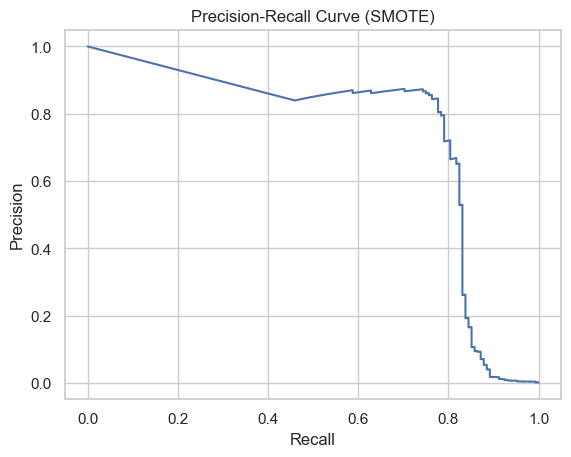

In [12]:
# Note: SMOTE and other imports are available from earlier cells.
from sklearn.metrics import precision_recall_curve, average_precision_score

print("\n=== C-3: Logistic Regression with SMOTE ===")

# Ensure df is available; if not, attempt to load it from the project's dataset path
if 'df' not in globals():
	try:
		pd  # check if pandas is available
	except NameError:
		import pandas as pd
	try:
		df = pd.read_csv(r'C:\Users\ACER\Desktop\Credit-Card-Fraud-Detection\data\creditcard.csv')
		print("Loaded df from disk for SMOTE step.")
	except FileNotFoundError:
		raise NameError("DataFrame 'df' is not defined and the default dataset file was not found. Run the data-loading cell before this one or place the dataset at the specified path.")

# Ensure the train/test split exists; create it if missing
if 'X_train' not in globals() or 'X_test' not in globals() or 'y_train' not in globals() or 'y_test' not in globals():
	features = [c for c in df.columns if c not in ['Class', 'Amount', 'Time']]
	X = df[features]
	y = df['Class']
	X_train, X_test, y_train, y_test = train_test_split(
		X, y, test_size=0.3, stratify=y, random_state=42
	)
	print("Created train/test split for SMOTE step:", X_train.shape, X_test.shape)
else:
	print("Using existing train/test split for SMOTE step.")

# Use existing smote instance if available, otherwise create one
try:
	smote
except NameError:
	smote = SMOTE(random_state=42)

# Apply SMOTE only on the training data
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train model
lr_smote = LogisticRegression(max_iter=2000, random_state=42)
lr_smote.fit(X_train_sm, y_train_sm)

# Predict on original test set
y_pred_sm = lr_smote.predict(X_test)
y_prob_sm = lr_smote.predict_proba(X_test)[:, 1]

# Metrics
print(classification_report(y_test, y_pred_sm))
print("ROC AUC:", roc_auc_score(y_test, y_prob_sm))
print("Average Precision:", average_precision_score(y_test, y_prob_sm))

# Optional: Plot PR curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_sm)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (SMOTE)")
plt.show()

In [ ]:
# ==============================================================================
# TASK C-4: TRAIN ADVANCED MODEL
# Goal: Train a powerful Random Forest model on the balanced data.
# ==============================================================================
print("\n--- Starting Task C-4: Train Advanced Model (Random Forest) ---")

# Ensure balanced training data exists; prefer SMOTE-resampled variables if present
if 'X_train_balanced' not in globals() or 'y_train_balanced' not in globals():
	if 'X_train_sm' in globals() and 'y_train_sm' in globals():
		X_train_balanced = X_train_sm
		y_train_balanced = y_train_sm
		print("Using SMOTE-resampled training set (X_train_sm / y_train_sm) as balanced data.")
	elif 'smote' in globals() and 'X_train' in globals() and 'y_train' in globals():
		X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
		print("Created balanced data using existing 'smote' instance.")
	else:
		# fallback: create a new SMOTE instance and resample
		from imblearn.over_sampling import SMOTE
		smote = SMOTE(random_state=42)
		X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
		print("Created SMOTE instance and generated balanced training data.")
else:
	print("Using existing X_train_balanced and y_train_balanced.")

# Train Random Forest on balanced data
advanced_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
advanced_model.fit(X_train_balanced, y_train_balanced)

print("Advanced model training complete.")
print("--- Task C-4 Complete ---")


--- Starting Task C-4: Train Advanced Model (Random Forest) ---
Using SMOTE-resampled training set (X_train_sm / y_train_sm) as balanced data.
